In [1]:
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 23s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


In [3]:
#Check the shape of the dataset: You can print the shapes of the training and test datasets to understand their structure.

print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)
   

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [4]:
#Class distribution: To see how many samples belong to each class, you can use the numpy library to count the occurrences of each label.
   
import numpy as np

unique, counts = np.unique(train_labels, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution in training set:", class_distribution)
   

Class distribution in training set: {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


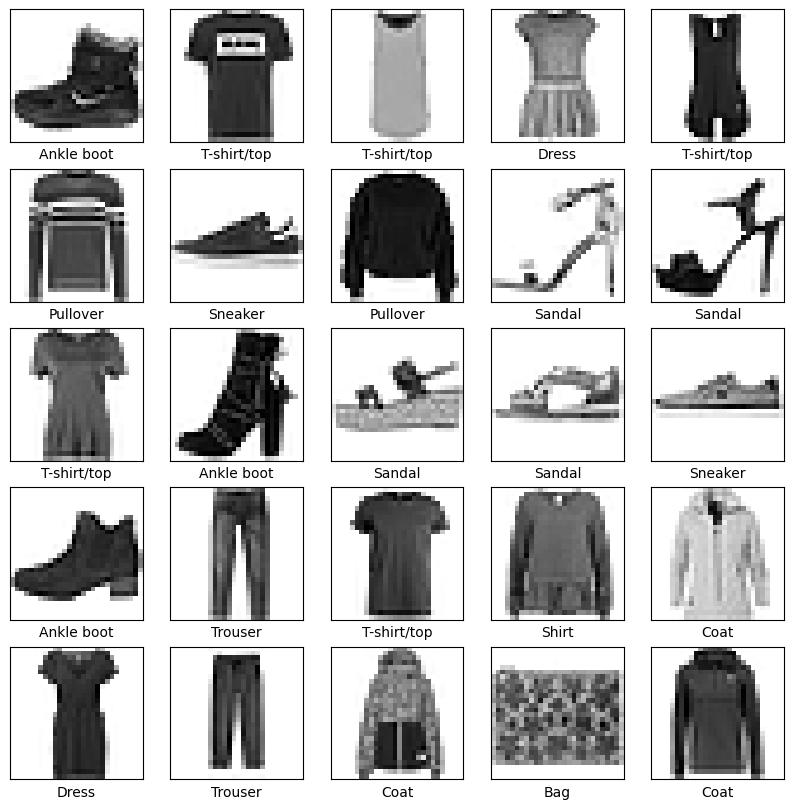

In [6]:
#Visualize a few samples: Display some images along with their labels to get a visual understanding of the dataset.
import matplotlib.pyplot as plt

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
   

In [8]:
# 1.3Visualize sample images from each clothing category

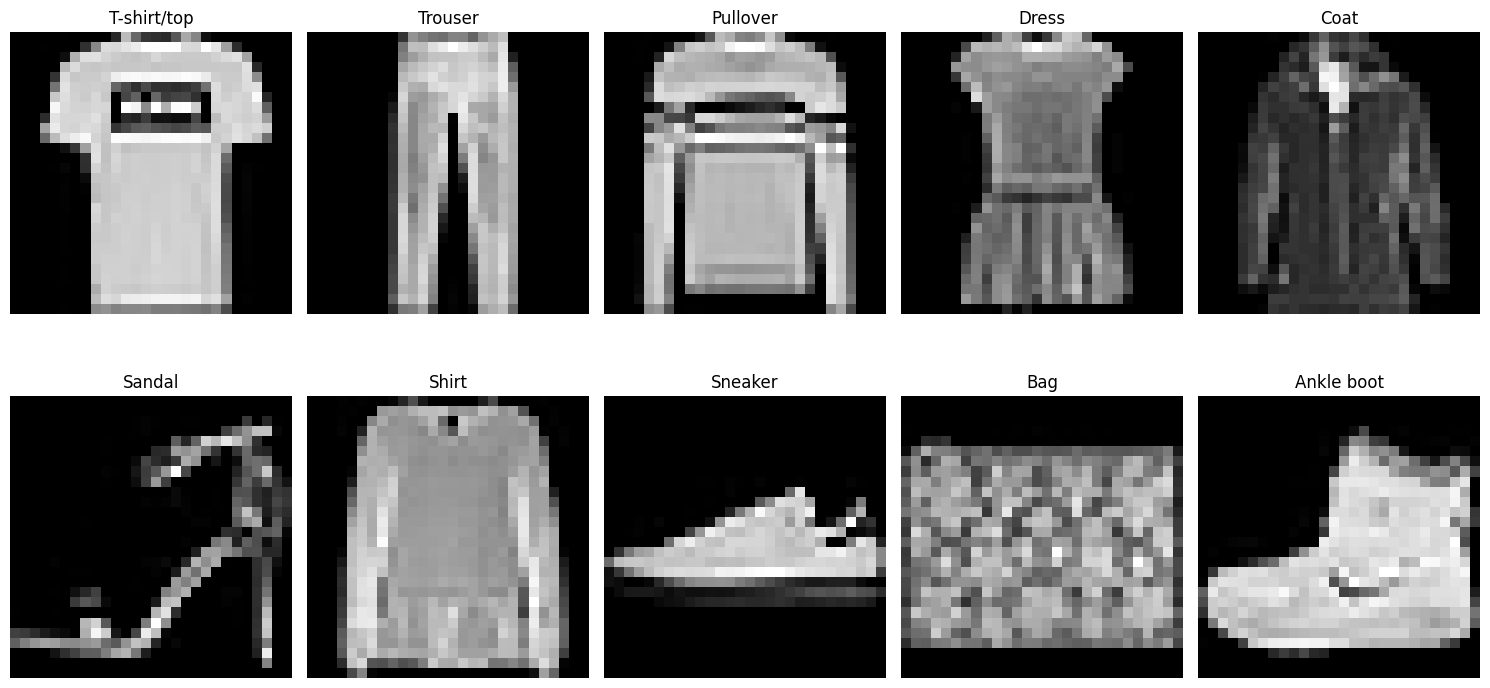

In [9]:

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create a figure to display samples from each class
plt.figure(figsize=(15, 8))

# Show one example from each class
for class_id in range(10):
    # Find the first occurrence of each class
    idx = np.where(train_labels == class_id)[0][0]
    
    plt.subplot(2, 5, class_id + 1)
    plt.imshow(train_images[idx], cmap='gray')
    plt.title(class_names[class_id])
    plt.axis('off')

plt.tight_layout()
plt.show()


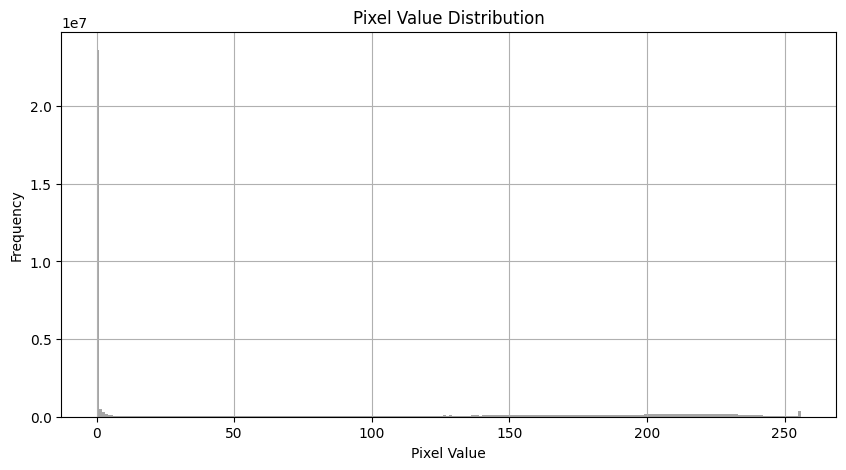

In [10]:
import matplotlib.pyplot as plt

# Flatten the images to create a single array of pixel values
pixel_values = train_images.flatten()

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(pixel_values, bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [11]:
mean_pixel_value = np.mean(pixel_values)
std_pixel_value = np.std(pixel_values)

print(f'Mean Pixel Value: {mean_pixel_value:.2f}')
print(f'Standard Deviation of Pixel Values: {std_pixel_value:.2f}')


Mean Pixel Value: 72.94
Standard Deviation of Pixel Values: 90.02


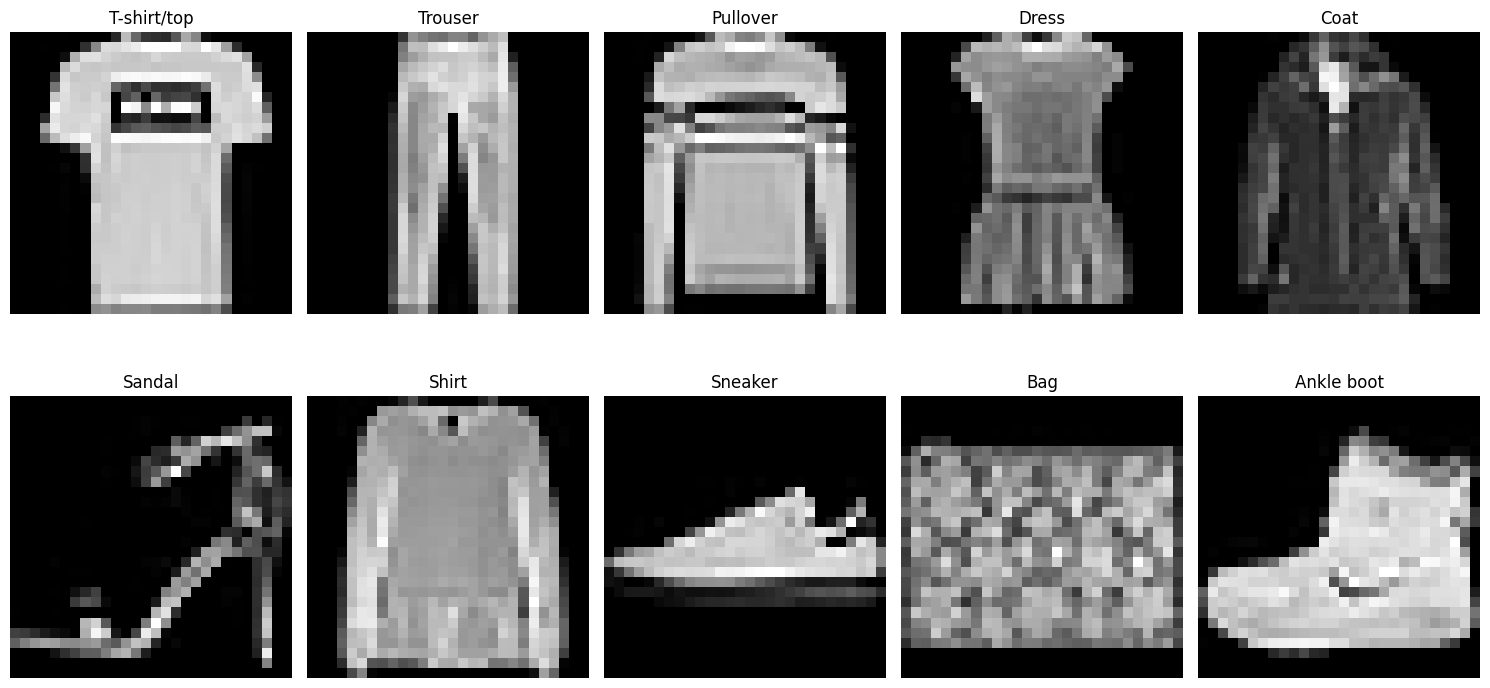

In [12]:
# Visualize sample images from each category
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[train_labels == i][0], cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


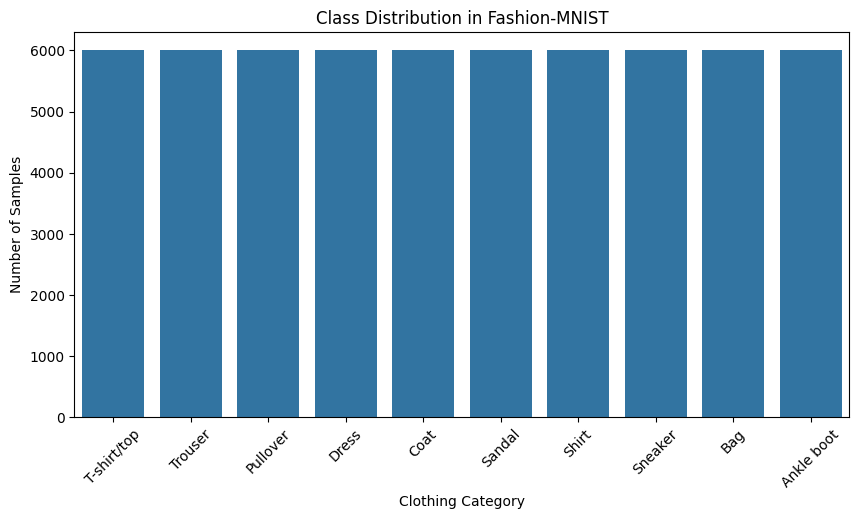

In [13]:
import seaborn as sns

# Count the occurrences of each class
class_counts = np.bincount(train_labels)

# Plot class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=class_names, y=class_counts)
plt.title('Class Distribution in Fashion-MNIST')
plt.xlabel('Clothing Category')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()


In [14]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create a class name mapping dictionary
class_name_mapping = {i: class_names[i] for i in range(len(class_names))}

# Display the class name mappings
print("Class Name Mappings:")
for index, name in class_name_mapping.items():
    print(f"{index}: {name}")


Class Name Mappings:
0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot


In [16]:
#Explanation:
#Load the Dataset: The dataset is loaded using Keras.
#Normalization: The pixel values are converted to float32 and divided by 255.0 to scale them to the range [0, 1].
#Verification: The minimum and maximum values of the normalized images are printed to confirm that the normalization was successful.

# Normalize pixel values to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Verify the normalization
print("Normalized training images range:", train_images.min(), "to", train_images.max())
print("Normalized test images range:", test_images.min(), "to", test_images.max())


Normalized training images range: 0.0 to 0.003921569
Normalized test images range: 0.0 to 0.003921569


In [17]:
import numpy as np

# Reshape training data (60,000 samples)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)  # Adding channel dimension

# Reshape test data (10,000 samples) 
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Verify the new shapes
print("Training data shape:", train_images.shape)  # Should be (60000, 28, 28, 1)
print("Test data shape:", test_images.shape)      # Should be (10000, 28, 28, 1)


Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [18]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
num_classes = 10  # There are 10 classes in Fashion-MNIST
train_labels_categorical = to_categorical(train_labels, num_classes)
test_labels_categorical = to_categorical(test_labels, num_classes)

# Verify the shape of the new labels
print("Original training labels shape:", train_labels.shape)  # Should be (60000,)
print("One-hot encoded training labels shape:", train_labels_categorical.shape)  # Should be (60000, 10)
print("Original test labels shape:", test_labels.shape)  # Should be (10000,)
print("One-hot encoded test labels shape:", test_labels_categorical.shape)  # Should be (10000, 10)


Original training labels shape: (60000,)
One-hot encoded training labels shape: (60000, 10)
Original test labels shape: (10000,)
One-hot encoded test labels shape: (10000, 10)


In [19]:
#2.4 Split training data into train/validation sets (80/20 split)

In [21]:
from sklearn.model_selection import train_test_split
# Split the training data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels_categorical, 
                                                  test_size=0.2, random_state=42)
# Verify the shapes of the new datasets
print("Training data shape:", X_train.shape)  # Should be (48000, 28, 28, 1)
print("Validation data shape:", X_val.shape)  # Should be (12000, 28, 28, 1)
print("Training labels shape:", y_train.shape)  # Should be (48000, 10)
print("Validation labels shape:", y_val.shape)  # Should be (12000, 10)

Training data shape: (48000, 28, 28, 1)
Validation data shape: (12000, 28, 28, 1)
Training labels shape: (48000, 10)
Validation labels shape: (12000, 10)


In [22]:
#2.5 Implement data augmentation (rotation, width/height shift, zoom)

#To implement data augmentation in Keras for the Fashion-MNIST dataset, you can use the ImageDataGenerator class. This allows you to apply transformations such as rotation, width/height shifts, and zoom to create more diverse training images, enhancing your model's robustness.

In [26]:
#Step1 Importing Libraries
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
   

In [31]:
#Create the ImageDataGenerator: Set up the ImageDataGenerator with the desired augmentation parameters.  
datagen = ImageDataGenerator(
       rotation_range=40,               # Random rotation between 0 and 40 degrees
       width_shift_range=0.2,           # Randomly shift images horizontally
       height_shift_range=0.2,          # Randomly shift images vertically
       zoom_range=0.2,                  # Randomly zoom in on images
       horizontal_flip=True,            # Randomly flip images horizontally
       fill_mode='nearest'              # Fill in new pixels with nearest pixel values
   )
   

In [32]:
#Fit the Data Generator: Fit the data generator to the training images.
datagen.fit(train_images)

In [35]:
#Use the Data Generator in Model Training: When training your model, use the flow method to generate augmented images on the fly.
   # Example model definition (you can define your own model)

# Example model definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the data generator
model.fit(datagen.flow(train_images, train_labels_categorical, batch_size=32),
          steps_per_epoch=int(len(train_images) / 32),  # Ensure this is an integer
          epochs=10)

   


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.0990 - loss: 2.3028
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.0989 - loss: 2.3028
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.0980 - loss: 2.3028
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.1002 - loss: 2.3028
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.0997 - loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.0989 - loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.1034 - loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.0987 - loss: 2.3028
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.0996 - loss: 2.3027
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.0967 - loss: 2.3027


In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = train_images.reshape(-1, 28*28)  # Flatten for FNN
test_images = test_images.reshape(-1, 28*28)

# One-hot encode labels
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Create baseline feedforward neural network
baseline_model = Sequential([
    Dense(256, activation='relu', input_shape=(28*28,)),  # First hidden layer
    Dropout(0.3),  # Regularization
    Dense(128, activation='relu'),  # Second hidden layer
    Dropout(0.2),
    Dense(10, activation='softmax')  # Output layer
])

# Compile the model
baseline_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model
history = baseline_model.fit(train_images, train_labels,
                            epochs=15,
                            batch_size=128,
                            validation_split=0.2)

# Evaluate on test set
test_loss, test_acc = baseline_model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc:.4f}')


C:\Users\forty\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6957 - loss: 0.8635 - val_accuracy: 0.8408 - val_loss: 0.4404
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8340 - loss: 0.4559 - val_accuracy: 0.8598 - val_loss: 0.3781
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8548 - loss: 0.3990 - val_accuracy: 0.8695 - val_loss: 0.3632
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8646 - loss: 0.3765 - val_accuracy: 0.8727 - val_loss: 0.3554
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8725 - loss: 0.3524 - val_accuracy: 0.8748 - val_loss: 0.3457
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8747 - loss: 0.3417 - val_accuracy: 0.8783 - val_loss: 0.3348
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8770 - loss: 0.3288 - val_accuracy: 0.8823 - val_loss: 0.3226
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8838 - loss: 0.3144 - val_accuracy: 0.

In [38]:
# 3.3 Document baseline accuracy and limitations
# Evaluate on test set

test_loss, test_acc = baseline_model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8836 - loss: 0.3291

Test accuracy: 0.8850


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load and preprocess Fashion-MNIST data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize and reshape images
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to categorical
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Define CNN architecture
model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    
    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    # Classification head
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels,
                   epochs=15,
                   batch_size=64,
                   validation_split=0.2)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')


Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.7136 - loss: 0.7956 - val_accuracy: 0.8706 - val_loss: 0.3503
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8652 - loss: 0.3848 - val_accuracy: 0.8883 - val_loss: 0.3023
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8800 - loss: 0.3320 - val_accuracy: 0.8996 - val_loss: 0.2720
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.8982 - loss: 0.2895 - val_accuracy: 0.9046 - val_loss: 0.2576
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9025 - loss: 0.2691 - val_accuracy: 0.9070 - val_loss: 0.2536
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9107 - loss: 0.2464 - val_accuracy: 0.9095 - val_loss: 0.2384
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9177 - loss: 0.2274 - val_accuracy: 0.9186 - val_loss: 0.2258
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9207 - loss: 0.2142 - 

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, BatchNormalization, 
                                   GlobalAveragePooling2D, Dense, Dropout)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Data preparation (proper shapes)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Advanced CNN architecture
model = Sequential([
    # Block 1 - 32 filters
    Conv2D(32, (3,3), activation='relu', padding='same', 
          kernel_regularizer=l2(1e-4), input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same',
          kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    # Block 2 - 64 filters
    Conv2D(64, (3,3), activation='relu', padding='same',
          kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same',
          kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.35),
    
    # Block 3 - 128 filters
    Conv2D(128, (3,3), activation='relu', padding='same',
          kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same',
          kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dropout(0.5),
    
    # Output
    Dense(10, activation='softmax')
])

# Compile with callbacks
model.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

# Model summary
model.summary()

# Training
history = model.fit(X_train, y_train,
                   epochs=50,
                   batch_size=128,
                   validation_split=0.2,
                   callbacks=callbacks)

# Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │              

 Total params: 289,514 (1.10 MB)

 Trainable params: 288,618 (1.10 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 124s 306ms/step - accuracy: 0.7217 - loss: 0.8116 - val_accuracy: 0.1328 - val_loss: 5.6577 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 117s 311ms/step - accuracy: 0.8778 - loss: 0.3873 - val_accuracy: 0.8879 - val_loss: 0.3568 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 114s 305ms/step - accuracy: 0.8967 - loss: 0.3334 - val_accuracy: 0.8997 - val_loss: 0.3307 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 112s 298ms/step - accuracy: 0.9051 - loss: 0.3121 - val_accuracy: 0.9057 - val_loss: 0.3035 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 110s 294ms/step - accuracy: 0.9117 - loss: 0.2923 - val_accuracy: 0.9196 - val_loss: 0.2796 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 104s 277ms/step - accuracy: 0.9191 - loss: 0.2790 - val_accuracy: 0.9114 - val_loss: 0.2949 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 104s 277ms/step - accura


Training model 1 with {'optimizer': 'adam', 'lr': 0.001, 'batch_size': 128}

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5174 - loss: 1.3592

375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 118ms/step - accuracy: 0.5178 - loss: 1.3582 - val_accuracy: 0.1543 - val_loss: 2.2161 - learning_rate: 0.0010
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7933 - loss: 0.6090

375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.7933 - loss: 0.6089 - val_accuracy: 0.8499 - val_loss: 0.5776 - learning_rate: 0.0010
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.8251 - loss: 0.5157

375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 119ms/step - accuracy: 0.8251 - loss: 0.5156 - val_accuracy: 0.8587 - val_loss: 0.4140 - learning_rate: 0.0010
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8416 - loss: 0.4749

375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 124ms/step - accuracy: 0.8416 - loss: 0.4749 - val_accuracy: 0.8680 - val_loss: 0.3860 - learning_rate: 0.0010
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 120ms/step - accuracy: 0.8524 - loss: 0.4453 - val_accuracy: 0.8543 - val_loss: 0.4224 - learning_rate: 0.0010
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.8576 - loss: 0.4308

375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 112ms/step - accuracy: 0.8576 - loss: 0.4308 - val_accuracy: 0.8761 - val_loss: 0.3708 - learning_rate: 0.0010
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 55s 145ms/step - accuracy: 0.8565 - loss: 0.4194 - val_accuracy: 0.8598 - val_loss: 0.3914 - learning_rate: 0.0010
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8594 - loss: 0.4130

375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 120ms/step - accuracy: 0.8594 - loss: 0.4130 - val_accuracy: 0.8781 - val_loss: 0.3601 - learning_rate: 0.0010
Epoch 9/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 115ms/step - accuracy: 0.8692 - loss: 0.3992 - val_accuracy: 0.8677 - val_loss: 0.3900 - learning_rate: 0.0010
Epoch 10/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 116ms/step - accuracy: 0.8705 - loss: 0.3903 - val_accuracy: 0.8788 - val_loss: 0.3635 - learning_rate: 0.0010
Epoch 11/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 119ms/step - accuracy: 0.8758 - loss: 0.3770 - val_accuracy: 0.8597 - val_loss: 0.4019 - learning_rate: 0.0010
Epoch 12/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8713 - loss: 0.3861

375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 116ms/step - accuracy: 0.8713 - loss: 0.3861 - val_accuracy: 0.8901 - val_loss: 0.3264 - learning_rate: 0.0010
Epoch 13/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 115ms/step - accuracy: 0.8738 - loss: 0.3827 - val_accuracy: 0.8857 - val_loss: 0.3391 - learning_rate: 0.0010
Epoch 14/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 116ms/step - accuracy: 0.8792 - loss: 0.3746 - val_accuracy: 0.8856 - val_loss: 0.3432 - learning_rate: 0.0010
Epoch 15/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 116ms/step - accuracy: 0.8808 - loss: 0.3632 - val_accuracy: 0.8900 - val_loss: 0.3291 - learning_rate: 0.0010
Epoch 16/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 116ms/step - accuracy: 0.8806 - loss: 0.3619 - val_accuracy: 0.8563 - val_loss: 0.4508 - learning_rate: 0.0010
Epoch 17/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 122ms/step - accuracy: 0.8792 - loss: 0.3672 - val_accuracy: 0.8855 - val_loss: 0.3464 - learning_rate: 0.0010
Epoch 18/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8

375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 118ms/step - accuracy: 0.8869 - loss: 0.3452 - val_accuracy: 0.9049 - val_loss: 0.2914 - learning_rate: 1.0000e-04
Epoch 19/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8896 - loss: 0.3370

375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 123ms/step - accuracy: 0.8896 - loss: 0.3370 - val_accuracy: 0.9077 - val_loss: 0.2849 - learning_rate: 1.0000e-04
Epoch 20/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 121ms/step - accuracy: 0.8919 - loss: 0.3300 - val_accuracy: 0.9062 - val_loss: 0.2890 - learning_rate: 1.0000e-04
Epoch 21/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.8927 - loss: 0.3300 - val_accuracy: 0.9030 - val_loss: 0.2921 - learning_rate: 1.0000e-04
Epoch 22/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8948 - loss: 0.3293

375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 123ms/step - accuracy: 0.8948 - loss: 0.3293 - val_accuracy: 0.9069 - val_loss: 0.2832 - learning_rate: 1.0000e-04
Epoch 23/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 127ms/step - accuracy: 0.8936 - loss: 0.3257 - val_accuracy: 0.9037 - val_loss: 0.2910 - learning_rate: 1.0000e-04
Epoch 24/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 122ms/step - accuracy: 0.8939 - loss: 0.3255 - val_accuracy: 0.9077 - val_loss: 0.2865 - learning_rate: 1.0000e-04
Epoch 25/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 113ms/step - accuracy: 0.8945 - loss: 0.3248 - val_accuracy: 0.9070 - val_loss: 0.2862 - learning_rate: 1.0000e-04
Epoch 26/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.8960 - loss: 0.3217

375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 119ms/step - accuracy: 0.8960 - loss: 0.3217 - val_accuracy: 0.9074 - val_loss: 0.2819 - learning_rate: 1.0000e-04
Epoch 27/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 118ms/step - accuracy: 0.8904 - loss: 0.3329 - val_accuracy: 0.9090 - val_loss: 0.2827 - learning_rate: 1.0000e-04
Epoch 28/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 118ms/step - accuracy: 0.8951 - loss: 0.3214 - val_accuracy: 0.9057 - val_loss: 0.2864 - learning_rate: 1.0000e-04
Epoch 29/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8940 - loss: 0.3212

375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.8940 - loss: 0.3212 - val_accuracy: 0.9103 - val_loss: 0.2779 - learning_rate: 1.0000e-04
Epoch 30/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 122ms/step - accuracy: 0.8960 - loss: 0.3212 - val_accuracy: 0.9081 - val_loss: 0.2835 - learning_rate: 1.0000e-04
Epoch 31/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 119ms/step - accuracy: 0.8923 - loss: 0.3240 - val_accuracy: 0.9033 - val_loss: 0.2938 - learning_rate: 1.0000e-04
Epoch 32/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 118ms/step - accuracy: 0.8955 - loss: 0.3249 - val_accuracy: 0.9056 - val_loss: 0.2844 - learning_rate: 1.0000e-04
Epoch 33/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 121ms/step - accuracy: 0.8954 - loss: 0.3149 - val_accuracy: 0.9102 - val_loss: 0.2808 - learning_rate: 1.0000e-04
Epoch 34/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 116ms/step - accuracy: 0.8948 - loss: 0.3191 - val_accuracy: 0.9098 - val_loss: 0.2783 - learning_rate: 1.0000e-04
Epoch 35/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 1

750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 64ms/step - accuracy: 0.5097 - loss: 1.3878 - val_accuracy: 0.7934 - val_loss: 0.7630 - learning_rate: 5.0000e-04
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7727 - loss: 0.6593

750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - accuracy: 0.7727 - loss: 0.6593 - val_accuracy: 0.8326 - val_loss: 0.5094 - learning_rate: 5.0000e-04
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8107 - loss: 0.5592

750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.8107 - loss: 0.5592 - val_accuracy: 0.8394 - val_loss: 0.4929 - learning_rate: 5.0000e-04
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8314 - loss: 0.5012

750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.8314 - loss: 0.5012 - val_accuracy: 0.8567 - val_loss: 0.4318 - learning_rate: 5.0000e-04
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8387 - loss: 0.4736

750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8387 - loss: 0.4736 - val_accuracy: 0.8770 - val_loss: 0.3751 - learning_rate: 5.0000e-04
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 65ms/step - accuracy: 0.8484 - loss: 0.4503 - val_accuracy: 0.8267 - val_loss: 0.5120 - learning_rate: 5.0000e-04
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - accuracy: 0.8573 - loss: 0.4307 - val_accuracy: 0.8595 - val_loss: 0.4013 - learning_rate: 5.0000e-04
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - accuracy: 0.8602 - loss: 0.4171 - val_accuracy: 0.8279 - val_loss: 0.5108 - learning_rate: 5.0000e-04
Epoch 9/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8605 - loss: 0.4178

750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 59ms/step - accuracy: 0.8605 - loss: 0.4178 - val_accuracy: 0.8802 - val_loss: 0.3550 - learning_rate: 5.0000e-04
Epoch 10/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8634 - loss: 0.4006

750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - accuracy: 0.8634 - loss: 0.4006 - val_accuracy: 0.8840 - val_loss: 0.3401 - learning_rate: 5.0000e-04
Epoch 11/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.8696 - loss: 0.3923 - val_accuracy: 0.8681 - val_loss: 0.3724 - learning_rate: 5.0000e-04
Epoch 12/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.8695 - loss: 0.3902 - val_accuracy: 0.8787 - val_loss: 0.3602 - learning_rate: 5.0000e-04
Epoch 13/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - accuracy: 0.8688 - loss: 0.3932 - val_accuracy: 0.8726 - val_loss: 0.3699 - learning_rate: 5.0000e-04
Epoch 14/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8713 - loss: 0.3838 - val_accuracy: 0.8776 - val_loss: 0.3645 - learning_rate: 5.0000e-04
Epoch 15/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.8721 - loss: 0.3778 - val_accuracy: 0.8662 - val_loss: 0.3765 - learning_rate: 5.0000e-04
Epoch 16/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/ste

750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - accuracy: 0.8811 - loss: 0.3626 - val_accuracy: 0.9013 - val_loss: 0.2990 - learning_rate: 5.0000e-05
Epoch 17/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8843 - loss: 0.3485

750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - accuracy: 0.8843 - loss: 0.3485 - val_accuracy: 0.9017 - val_loss: 0.2955 - learning_rate: 5.0000e-05
Epoch 18/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.8860 - loss: 0.3521 - val_accuracy: 0.8999 - val_loss: 0.3000 - learning_rate: 5.0000e-05
Epoch 19/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8827 - loss: 0.3526

750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.8827 - loss: 0.3526 - val_accuracy: 0.9030 - val_loss: 0.2895 - learning_rate: 5.0000e-05
Epoch 20/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8818 - loss: 0.3509

750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8818 - loss: 0.3509 - val_accuracy: 0.9032 - val_loss: 0.2892 - learning_rate: 5.0000e-05
Epoch 21/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8860 - loss: 0.3414

750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.8860 - loss: 0.3414 - val_accuracy: 0.9040 - val_loss: 0.2862 - learning_rate: 5.0000e-05
Epoch 22/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8863 - loss: 0.3410 - val_accuracy: 0.9039 - val_loss: 0.2870 - learning_rate: 5.0000e-05
Epoch 23/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 67ms/step - accuracy: 0.8846 - loss: 0.3510 - val_accuracy: 0.9041 - val_loss: 0.2877 - learning_rate: 5.0000e-05
Epoch 24/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8848 - loss: 0.3470 - val_accuracy: 0.9033 - val_loss: 0.2879 - learning_rate: 5.0000e-05
Epoch 25/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8857 - loss: 0.3427 - val_accuracy: 0.9044 - val_loss: 0.2906 - learning_rate: 5.0000e-05
Epoch 26/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8886 - loss: 0.3390

750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8886 - loss: 0.3390 - val_accuracy: 0.9059 - val_loss: 0.2847 - learning_rate: 5.0000e-05
Epoch 27/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8858 - loss: 0.3427 - val_accuracy: 0.9040 - val_loss: 0.2899 - learning_rate: 5.0000e-05
Epoch 28/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - accuracy: 0.8894 - loss: 0.3355 - val_accuracy: 0.9054 - val_loss: 0.2858 - learning_rate: 5.0000e-05
Epoch 29/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 65ms/step - accuracy: 0.8876 - loss: 0.3343 - val_accuracy: 0.9019 - val_loss: 0.2963 - learning_rate: 5.0000e-05
Epoch 30/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8914 - loss: 0.3342

750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.8914 - loss: 0.3342 - val_accuracy: 0.9064 - val_loss: 0.2833 - learning_rate: 5.0000e-05
Epoch 31/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8883 - loss: 0.3378

750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 67ms/step - accuracy: 0.8882 - loss: 0.3378 - val_accuracy: 0.9056 - val_loss: 0.2829 - learning_rate: 5.0000e-05
Epoch 32/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8898 - loss: 0.3366

750/750 ━━━━━━━━━━━━━━━━━━━━ 54s 72ms/step - accuracy: 0.8898 - loss: 0.3366 - val_accuracy: 0.9080 - val_loss: 0.2826 - learning_rate: 5.0000e-05
Epoch 33/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 67ms/step - accuracy: 0.8900 - loss: 0.3330 - val_accuracy: 0.8992 - val_loss: 0.3024 - learning_rate: 5.0000e-05
Epoch 34/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 58s 77ms/step - accuracy: 0.8878 - loss: 0.3338 - val_accuracy: 0.9067 - val_loss: 0.2837 - learning_rate: 5.0000e-05
Epoch 35/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.8887 - loss: 0.3347 - val_accuracy: 0.9060 - val_loss: 0.2860 - learning_rate: 5.0000e-05
Epoch 36/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.8894 - loss: 0.3381 - val_accuracy: 0.9044 - val_loss: 0.2852 - learning_rate: 5.0000e-05
Epoch 37/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8891 - loss: 0.3354

750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8891 - loss: 0.3354 - val_accuracy: 0.9072 - val_loss: 0.2785 - learning_rate: 5.0000e-05
Epoch 38/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 66ms/step - accuracy: 0.8906 - loss: 0.3356 - val_accuracy: 0.9047 - val_loss: 0.2861 - learning_rate: 5.0000e-05
Epoch 39/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 67ms/step - accuracy: 0.8871 - loss: 0.3320 - val_accuracy: 0.9064 - val_loss: 0.2855 - learning_rate: 5.0000e-05
Epoch 40/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 65ms/step - accuracy: 0.8894 - loss: 0.3360 - val_accuracy: 0.9075 - val_loss: 0.2808 - learning_rate: 5.0000e-05
Epoch 41/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 65ms/step - accuracy: 0.8934 - loss: 0.3309 - val_accuracy: 0.9071 - val_loss: 0.2803 - learning_rate: 5.0000e-05
Epoch 42/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 66ms/step - accuracy: 0.8900 - loss: 0.3324 - val_accuracy: 0.9055 - val_loss: 0.2846 - learning_rate: 5.0000e-05
Epoch 43/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 67ms/st

375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 151ms/step - accuracy: 0.4843 - loss: 1.4376 - val_accuracy: 0.1310 - val_loss: 2.1545 - learning_rate: 0.0100
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.7371 - loss: 0.7396

375/375 ━━━━━━━━━━━━━━━━━━━━ 63s 169ms/step - accuracy: 0.7372 - loss: 0.7395 - val_accuracy: 0.7383 - val_loss: 0.7456 - learning_rate: 0.0100
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.7848 - loss: 0.6258

375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 158ms/step - accuracy: 0.7848 - loss: 0.6257 - val_accuracy: 0.7937 - val_loss: 0.6057 - learning_rate: 0.0100
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.8036 - loss: 0.5751

375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 150ms/step - accuracy: 0.8036 - loss: 0.5750 - val_accuracy: 0.8231 - val_loss: 0.5084 - learning_rate: 0.0100
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 60s 161ms/step - accuracy: 0.8172 - loss: 0.5375 - val_accuracy: 0.8129 - val_loss: 0.5116 - learning_rate: 0.0100
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.8311 - loss: 0.4965

375/375 ━━━━━━━━━━━━━━━━━━━━ 60s 161ms/step - accuracy: 0.8311 - loss: 0.4965 - val_accuracy: 0.8444 - val_loss: 0.4484 - learning_rate: 0.0100
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 61s 163ms/step - accuracy: 0.8341 - loss: 0.4875 - val_accuracy: 0.7919 - val_loss: 0.5915 - learning_rate: 0.0100
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.8404 - loss: 0.4691

375/375 ━━━━━━━━━━━━━━━━━━━━ 61s 163ms/step - accuracy: 0.8404 - loss: 0.4691 - val_accuracy: 0.8690 - val_loss: 0.3988 - learning_rate: 0.0100
Epoch 9/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 60s 161ms/step - accuracy: 0.8494 - loss: 0.4458 - val_accuracy: 0.8591 - val_loss: 0.4254 - learning_rate: 0.0100
Epoch 10/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 133ms/step - accuracy: 0.8490 - loss: 0.4442 - val_accuracy: 0.8482 - val_loss: 0.4301 - learning_rate: 0.0100
Epoch 11/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8562 - loss: 0.4243

375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 128ms/step - accuracy: 0.8562 - loss: 0.4243 - val_accuracy: 0.8802 - val_loss: 0.3519 - learning_rate: 0.0100
Epoch 12/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 127ms/step - accuracy: 0.8547 - loss: 0.4326 - val_accuracy: 0.8692 - val_loss: 0.3729 - learning_rate: 0.0100
Epoch 13/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.8604 - loss: 0.4167

375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 121ms/step - accuracy: 0.8604 - loss: 0.4167 - val_accuracy: 0.8809 - val_loss: 0.3498 - learning_rate: 0.0100
Epoch 14/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 120ms/step - accuracy: 0.8607 - loss: 0.4092 - val_accuracy: 0.8763 - val_loss: 0.3643 - learning_rate: 0.0100
Epoch 15/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 125ms/step - accuracy: 0.8667 - loss: 0.4036 - val_accuracy: 0.8273 - val_loss: 0.5293 - learning_rate: 0.0100
Epoch 16/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 156ms/step - accuracy: 0.8675 - loss: 0.3987 - val_accuracy: 0.8742 - val_loss: 0.3742 - learning_rate: 0.0100
Epoch 17/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 54s 143ms/step - accuracy: 0.8693 - loss: 0.3912 - val_accuracy: 0.8281 - val_loss: 0.4714 - learning_rate: 0.0100
Epoch 18/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 55s 147ms/step - accuracy: 0.8677 - loss: 0.3957 - val_accuracy: 0.8820 - val_loss: 0.3508 - learning_rate: 0.0100
Epoch 19/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.8

375/375 ━━━━━━━━━━━━━━━━━━━━ 55s 145ms/step - accuracy: 0.8750 - loss: 0.3832 - val_accuracy: 0.9015 - val_loss: 0.3005 - learning_rate: 1.0000e-03
Epoch 20/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 52s 138ms/step - accuracy: 0.8800 - loss: 0.3676 - val_accuracy: 0.8982 - val_loss: 0.3052 - learning_rate: 1.0000e-03
Epoch 21/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8796 - loss: 0.3608

375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 129ms/step - accuracy: 0.8796 - loss: 0.3608 - val_accuracy: 0.9005 - val_loss: 0.3004 - learning_rate: 1.0000e-03
Epoch 22/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 129ms/step - accuracy: 0.8798 - loss: 0.3614 - val_accuracy: 0.9011 - val_loss: 0.3004 - learning_rate: 1.0000e-03
Epoch 23/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 125ms/step - accuracy: 0.8786 - loss: 0.3651 - val_accuracy: 0.9011 - val_loss: 0.3008 - learning_rate: 1.0000e-03
Epoch 24/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 122ms/step - accuracy: 0.8796 - loss: 0.3621 - val_accuracy: 0.8955 - val_loss: 0.3089 - learning_rate: 1.0000e-03
Epoch 25/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 133ms/step - accuracy: 0.8837 - loss: 0.3572 - val_accuracy: 0.8930 - val_loss: 0.3154 - learning_rate: 1.0000e-03
Epoch 26/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 128ms/step - accuracy: 0.8795 - loss: 0.3630 - val_accuracy: 0.8981 - val_loss: 0.3075 - learning_rate: 1.0000e-03
Epoch 27/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 1

375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 130ms/step - accuracy: 0.8816 - loss: 0.3555 - val_accuracy: 0.9026 - val_loss: 0.2965 - learning_rate: 1.0000e-04
Epoch 29/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8819 - loss: 0.3515

375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 123ms/step - accuracy: 0.8819 - loss: 0.3515 - val_accuracy: 0.9041 - val_loss: 0.2944 - learning_rate: 1.0000e-04
Epoch 30/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 123ms/step - accuracy: 0.8794 - loss: 0.3645 - val_accuracy: 0.9028 - val_loss: 0.2962 - learning_rate: 1.0000e-04
Epoch 31/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 128ms/step - accuracy: 0.8812 - loss: 0.3514 - val_accuracy: 0.9001 - val_loss: 0.3006 - learning_rate: 1.0000e-04
Epoch 32/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 131ms/step - accuracy: 0.8843 - loss: 0.3573 - val_accuracy: 0.9013 - val_loss: 0.2991 - learning_rate: 1.0000e-04
Epoch 33/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 134ms/step - accuracy: 0.8829 - loss: 0.3499 - val_accuracy: 0.9000 - val_loss: 0.3003 - learning_rate: 1.0000e-04
Epoch 34/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8815 - loss: 0.3595

375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 133ms/step - accuracy: 0.8815 - loss: 0.3594 - val_accuracy: 0.9034 - val_loss: 0.2939 - learning_rate: 1.0000e-04
Epoch 35/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 131ms/step - accuracy: 0.8845 - loss: 0.3488 - val_accuracy: 0.9021 - val_loss: 0.2981 - learning_rate: 1.0000e-04
Epoch 36/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 122ms/step - accuracy: 0.8796 - loss: 0.3587 - val_accuracy: 0.9038 - val_loss: 0.2941 - learning_rate: 1.0000e-04
Epoch 37/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8813 - loss: 0.3521

375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 129ms/step - accuracy: 0.8813 - loss: 0.3521 - val_accuracy: 0.9043 - val_loss: 0.2934 - learning_rate: 1.0000e-04
Epoch 38/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 131ms/step - accuracy: 0.8835 - loss: 0.3505 - val_accuracy: 0.9022 - val_loss: 0.2972 - learning_rate: 1.0000e-04
Epoch 39/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8863 - loss: 0.3447

375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 129ms/step - accuracy: 0.8863 - loss: 0.3448 - val_accuracy: 0.9049 - val_loss: 0.2924 - learning_rate: 1.0000e-04
Epoch 40/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 130ms/step - accuracy: 0.8807 - loss: 0.3558 - val_accuracy: 0.9028 - val_loss: 0.2961 - learning_rate: 1.0000e-04
Epoch 41/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 130ms/step - accuracy: 0.8820 - loss: 0.3543 - val_accuracy: 0.9037 - val_loss: 0.2940 - learning_rate: 1.0000e-04
Epoch 42/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 124ms/step - accuracy: 0.8836 - loss: 0.3511 - val_accuracy: 0.9030 - val_loss: 0.2967 - learning_rate: 1.0000e-04
Epoch 43/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 125ms/step - accuracy: 0.8831 - loss: 0.3539 - val_accuracy: 0.9036 - val_loss: 0.2943 - learning_rate: 1.0000e-04
Epoch 44/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 132ms/step - accuracy: 0.8820 - loss: 0.3562 - val_accuracy: 0.9040 - val_loss: 0.2939 - learning_rate: 1.0000e-04
Epoch 45/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 1

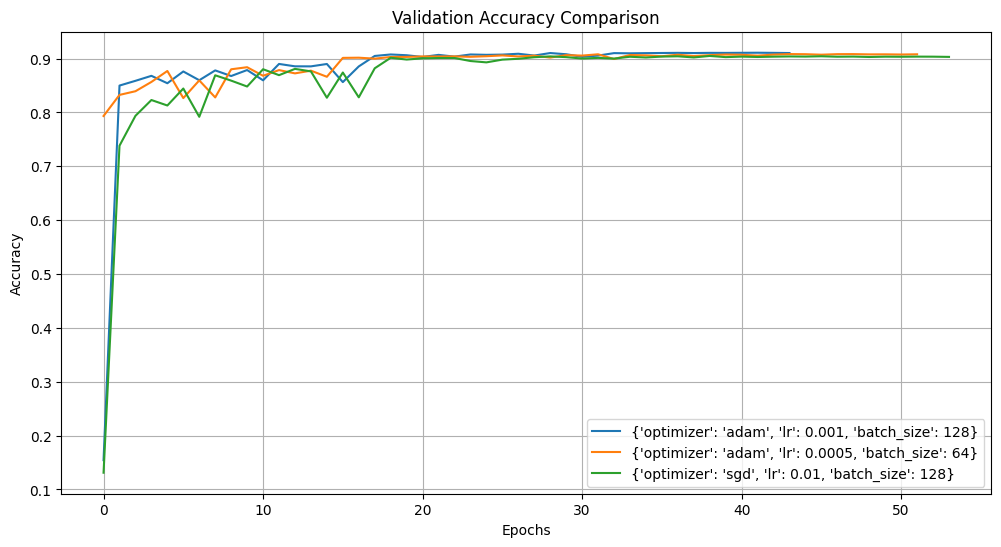

In [44]:
import tensorflow as tf
from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau, 
                                      ModelCheckpoint, TensorBoard)
from tensorflow.keras.optimizers import Adam, SGD
import datetime

# Load and prepare data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define model function for easy experimentation
def build_model(optimizer='adam', learning_rate=0.001):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', 
              kernel_regularizer=tf.keras.regularizers.l2(1e-4),
              input_shape=(28,28,1)),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.2),
        
        Conv2D(64, (3,3), activation='relu', padding='same',
              kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.3),
        
        GlobalAveragePooling2D(),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    
    if optimizer.lower() == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
        
    model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model

# Training configurations to experiment with
configs = [
    {'optimizer': 'adam', 'lr': 0.001, 'batch_size': 128},
    {'optimizer': 'adam', 'lr': 0.0005, 'batch_size': 64},
    {'optimizer': 'sgd', 'lr': 0.01, 'batch_size': 128}
]

# Callback configuration
def get_callbacks(model_name):
    timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    log_dir = f"logs/{model_name}_{timestamp}"
    
    return [
        EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5),
        ModelCheckpoint(f'best_{model_name}.h5', save_best_only=True),
        TensorBoard(log_dir=log_dir)
    ]

# Training loop for different configurations
histories = []
for i, config in enumerate(configs):
    print(f"\nTraining model {i+1} with {config}\n")
    
    model = build_model(optimizer=config['optimizer'], 
                       learning_rate=config['lr'])
    
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=config['batch_size'],
        validation_split=0.2,
        callbacks=get_callbacks(f"model_{i}"),
        verbose=1
    )
    
    histories.append(history)
    
    # Evaluate
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"\n{config} - Test accuracy: {test_acc:.4f}\n")

# Plotting helper function (run in notebook environment)
def plot_history(histories, configs):
    plt.figure(figsize=(12, 6))
    for i, history in enumerate(histories):
        plt.plot(history.history['val_accuracy'], label=f"{configs[i]}")
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

plot_history(histories, configs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9009 - loss: 0.2975
Test accuracy: 0.8993
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


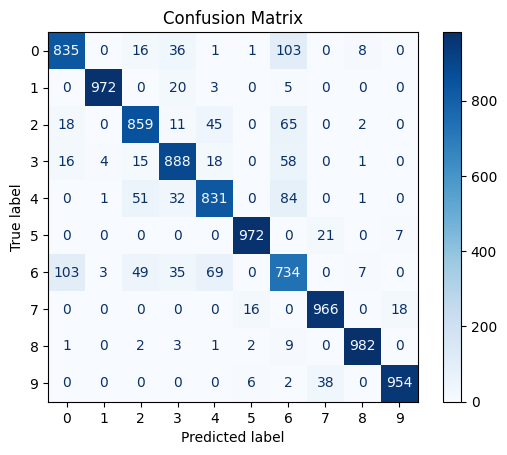

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.86      0.83      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.87      0.86      0.86      1000
       Dress       0.87      0.89      0.88      1000
        Coat       0.86      0.83      0.84      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.69      0.73      0.71      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



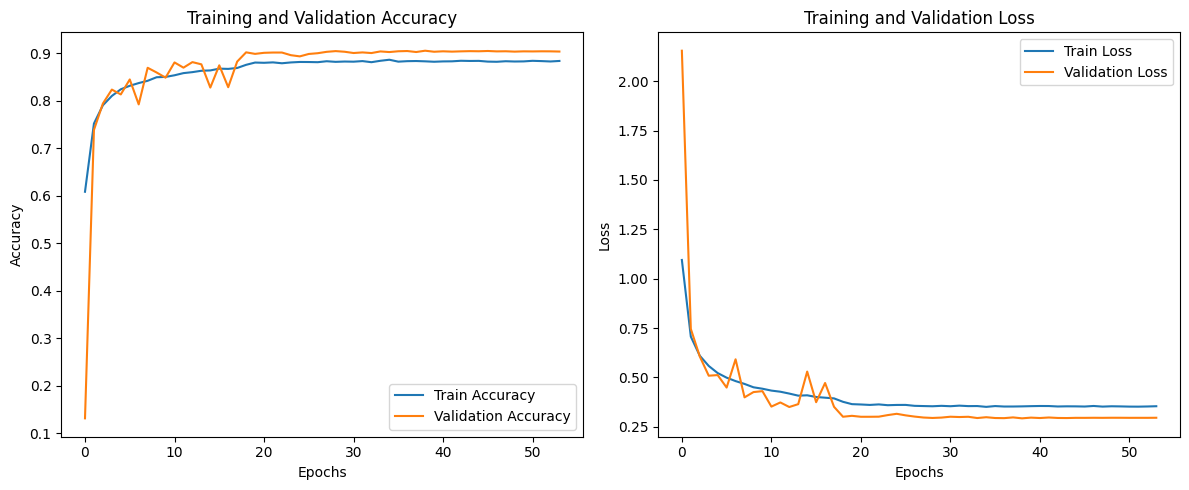

Accuracy for T-shirt/top: 0.83
Accuracy for Trouser: 0.97
Accuracy for Pullover: 0.86
Accuracy for Dress: 0.89
Accuracy for Coat: 0.83
Accuracy for Sandal: 0.97
Accuracy for Shirt: 0.73
Accuracy for Sneaker: 0.97
Accuracy for Bag: 0.98
Accuracy for Ankle boot: 0.95
Baseline Model Test Accuracy: 0.8900
CNN Model Test Accuracy: 0.8993


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10)).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_true_classes, y_pred_classes, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
])
print("Classification Report:\n", report)

# Visualize training/validation curves
def plot_training_curves(history):
    plt.figure(figsize=(12, 5))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Call the function to plot curves
plot_training_curves(history)

# Analyze which clothing items are most/least accurately classified
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Calculate accuracy per class
class_accuracy = cm.diagonal() / cm.sum(axis=1)
for i, class_name in enumerate(class_names):
    print(f'Accuracy for {class_name}: {class_accuracy[i]:.2f}')

# Compare CNN performance with baseline model
# Assuming baseline_test_acc is the accuracy of the baseline model
baseline_test_acc = 0.89  # Example value, replace with actual baseline accuracy
print(f'Baseline Model Test Accuracy: {baseline_test_acc:.4f}')
print(f'CNN Model Test Accuracy: {test_acc:.4f}')
